In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [3]:
df = pd.read_csv('DSA3101_Share/2008_data_with_weather.csv')

In [4]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'datetime', 'origin_state', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [5]:
df.drop(['Year', 'DepTime', 'ArrTime', 'FlightNum', 'ActualElapsedTime', 'DepDelay', 'AirTime', 'TailNum', \
         'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted','CarrierDelay', 'WeatherDelay', \
         'NASDelay', 'SecurityDelay', 'LateAircraftDelay', \
         'datetime', 'origin_state', 'solarradiation', 'solarenergy', 'severerisk', 'sunrise', 'sunset', \
         'moonphase', 'description', 'icon', 'stations', 'windgust', 'preciptype','uvindex'], axis=1, inplace=True)

In [6]:
df['ArrDelayed'] = (df['ArrDelay'] > 0).astype(int)

In [7]:
df.drop('ArrDelay', axis=1, inplace=True)

In [8]:
# Transform the time CRSDepTime and CRSArrTime columns into hour only
df["CRSDepHour"] = df["CRSDepTime"] // 100
df["CRSArrHour"] = df["CRSArrTime"] // 100
df.drop(['CRSDepTime', 'CRSArrTime'], axis=1, inplace=True)

In [9]:
# Convert Month, DayofMonth, DayOfWeek into categorical variables
df[["Month", "DayofMonth", "DayOfWeek"]] = df[["Month", "DayofMonth", "DayOfWeek"]].astype(str)

In [10]:
# Split CRSDepHour and CRSArrHour into 8 classes
hour_map = {1: "1TO3", 2: "1TO3", 3: "1TO3",
            4: "4TO6", 5: "4TO6", 6: "4TO6",
            7: "7TO9", 8: "7TO9", 9: "7TO9",
            10: "10TO12", 11: "10TO12", 12: "10TO12",
            13: "13TO15", 14: "13TO15", 15: "13TO15",
            16: "16TO18", 17: "16TO18", 18: "16TO18",
            19: "19TO21", 20: "19TO21", 21: "19TO21",
            22: "22TO0", 23: "22TO0", 24: "22TO0", 0: "22TO0"}
df = df.replace({'CRSDepHour': hour_map, 'CRSArrHour': hour_map})

In [11]:
df.dropna(inplace = True)

In [12]:
df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,CRSElapsedTime,Origin,Dest,Distance,tempmax,tempmin,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,ArrDelayed,CRSDepHour,CRSArrHour
0,1,3,4,WN,70.0,HOU,LIT,393,11.5,-2.3,...,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1,13TO15,13TO15
1,1,3,4,WN,85.0,HOU,MAF,441,11.5,-2.3,...,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1,10TO12,10TO12
2,1,3,4,WN,85.0,HOU,MAF,441,11.5,-2.3,...,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,0,19TO21,19TO21
3,1,3,4,WN,130.0,HOU,MCO,848,11.5,-2.3,...,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,0,7TO9,10TO12
4,1,3,4,WN,130.0,HOU,MCO,848,11.5,-2.3,...,0.0,15.7,154.3,1038.6,15.3,16.0,Clear,1,13TO15,16TO18


In [13]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df)

In [14]:
df.columns

Index(['CRSElapsedTime', 'Distance', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       ...
       'CRSDepHour_4TO6', 'CRSDepHour_7TO9', 'CRSArrHour_10TO12',
       'CRSArrHour_13TO15', 'CRSArrHour_16TO18', 'CRSArrHour_19TO21',
       'CRSArrHour_1TO3', 'CRSArrHour_22TO0', 'CRSArrHour_4TO6',
       'CRSArrHour_7TO9'],
      dtype='object', length=580)

# Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Softmax

In [16]:
# Due to RAM issue, drop ArrDelayed column in df instead of creating new table X
y = df[["ArrDelayed"]]
df = df.drop(labels=["ArrDelayed"], axis=1)

In [17]:
# Due to RAM issue, use only 10% of data
from sklearn.model_selection import train_test_split
df, _, y, _ = train_test_split(df, y, train_size=0.1, random_state=42)

In [18]:
df.shape

(219409, 579)

In [19]:
# Split into training dataset and test dataset
from sklearn.model_selection import train_test_split
train, test, labels_enc_train, labels_test = train_test_split(df, y, train_size=0.8, random_state=42)

In [20]:
# Convert ArrDelayed column into one-hot encoded version
labels_enc_train["ONTIME"] = 1-labels_enc_train["ArrDelayed"]
labels_enc_train["DELAY"] = labels_enc_train["ArrDelayed"]

# Keep the original labels
labels_train = labels_enc_train["ArrDelayed"]
labels_test = labels_test["ArrDelayed"]

labels_enc_train = labels_enc_train.drop(labels=["ArrDelayed"], axis=1)

In [21]:
n_inputs, n_outputs = train.shape[1], labels_enc_train.shape[1]

In [22]:
# Using three linear transformation layers
# 1st layer: input size = n_inputs (579)    output size = 64
# 2nd layer: input size = 64                output size = 32
# 3rd layer: input size = 32                output size = n_outputs (2)
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_outputs))
    model.add(Softmax())
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
# Fitting model
model = get_model(n_inputs, n_outputs)
model.fit(train,labels_enc_train,epochs=50)

Epoch 1/50
5486/5486 [==============================] - 17s 3ms/step - loss: 0.8954 - accuracy: 0.5375
Epoch 2/50
5486/5486 [==============================] - 19s 3ms/step - loss: 0.6933 - accuracy: 0.5569
Epoch 3/50
5486/5486 [==============================] - 15s 3ms/step - loss: 0.6809 - accuracy: 0.5634
Epoch 4/50
5486/5486 [==============================] - 16s 3ms/step - loss: 0.6777 - accuracy: 0.5737
Epoch 5/50
5486/5486 [==============================] - 16s 3ms/step - loss: 0.6753 - accuracy: 0.5804
Epoch 6/50
5486/5486 [==============================] - 15s 3ms/step - loss: 0.6743 - accuracy: 0.5813
Epoch 7/50
5486/5486 [==============================] - 15s 3ms/step - loss: 0.6736 - accuracy: 0.5832
Epoch 8/50
5486/5486 [==============================] - 18s 3ms/step - loss: 0.6722 - accuracy: 0.5870
Epoch 9/50
5486/5486 [==============================] - 16s 3ms/step - loss: 0.6719 - accuracy: 0.5865
Epoch 10/50
5486/5486 [==============================] - 16s 3ms/step - l

In [24]:
# Example prediction of the model
# It is two dimensional vector in the form [ probability of punctual, probability of delay ]
model.predict(train.iloc[0:1,:])

1/1 [==============================] - 0s 183ms/step


array([[0.6698915 , 0.33010855]], dtype=float32)

In [25]:
# Using np.argmax to get actual label (0 for punctual, 1 for delay)
# Get the prediction on test dataset
pred = np.apply_along_axis(np.argmax, 1, model.predict(test))
accuracy = np.mean(pred == labels_test)

print(f'The accuracy is {accuracy*100:2.2f}%')

1372/1372 [==============================] - 2s 2ms/step
The accuracy is 58.49%


In [26]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68     23527
           1       0.60      0.31      0.41     20355

    accuracy                           0.58     43882
   macro avg       0.59      0.57      0.54     43882
weighted avg       0.59      0.58      0.55     43882



# Shap

In [27]:
try:
    import shap
except ModuleNotFoundError: # Install optax if missing
    !pip install --quiet shap
    import shap

In [28]:
explainer = shap.KernelExplainer(model = model.predict, data = test.head(100), link = "identity")

4/4 [==============================] - 0s 4ms/step


In [30]:
# Calculate shap values
# Note: We are limiting to the first 100 training examples since it takes time to calculate the full number of sampels
shap_values = explainer.shap_values(X = test.iloc[0:100,:], nsamples = 500)

  0%|          | 0/100 [00:00<?, ?it/s]

1563/1563 [==============================] - 2s 2ms/step


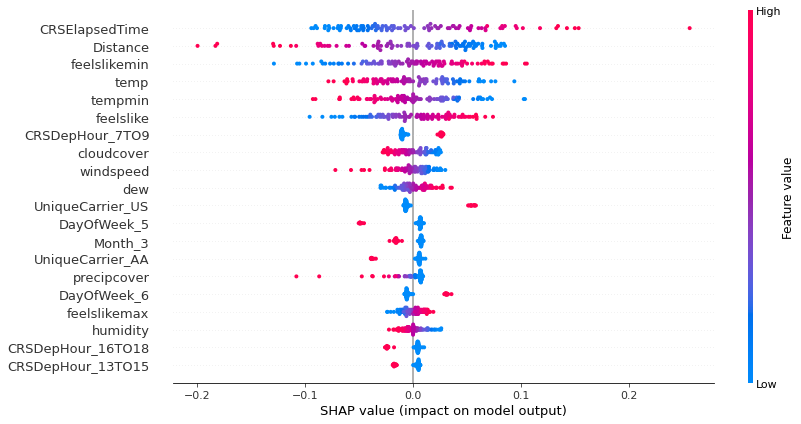

In [33]:
# Show the plot
# Explanation example: high value of CRSElapsedTIme increase the probability of punctual
shap.summary_plot(shap_values = shap_values[0],
                  features = test.iloc[0:100,:],
                  plot_size = (12,6)
                  )